# Assignment 2: Naive Bayes [20 marks]

Student Name:ZHUOYA ZHOU

Student ID:1366573

## General info

<b>Due date</b>: Friday, 2 September 2022, 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class. 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficiency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or excessively inefficient code.

7 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

13 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [7 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as nominal and use them as provided (e.g., do **not** convert them to other feature types, such as numeric ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms. You must use epsilon smoothing strategy as discussed in the Naive Bayes lecture. 
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation.
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*
6. Please place the jupyter notebook into the same folder as the input data.


In [141]:
# This function should open a csv file and read the data into a useable format [0.5 mark]
import csv
def preprocess(filename):
    feature_name=[]  #all feature names for file
    features=[]      #all feature values for each record
    labels=[]        #label for each record
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                feature_name=row[1:-1]
                line_count += 1
            else:
                features.append(row[1:-1])     #remove id and label
                labels.append(row[-1])
                line_count += 1
    return feature_name,features,labels

In [142]:
# This function should build a supervised NB model [3 marks]
import math
def count_label_and_feature_label(features,labels):
    label_count=dict()
    feature_label_count=dict()
    feature_count = dict()
    
    for feature_values, label in zip(features, labels):
        # label count
        label_count[label] = label_count.get(label,0.) + 1.
        # feature | label count
        index = 0   #the index of current feature
        for feature_value in feature_values:
            key = "|".join([str(index), feature_value, label])   #let the "feature_value | label" as the key   
            feature_label_count[key] = feature_label_count.get(key,0.) + 1.
            key2 = "|".join([str(index), feature_value])
            feature_count[key2] = feature_count.get(key2,0.) + 1.
            index += 1
    return label_count, feature_label_count, feature_count

def train(features,labels):
    
    #1. count each label and the each feature_value under the each label condition
    label_count, feature_label_count, _ = count_label_and_feature_label(features,labels)
            
    #2. compute the probability of each label and the each feature_value under the each label condition
    all_records_len = len(features)
    
    log_label_p = dict()             #log p(label)
    for label,count in label_count.items():
        log_label_p[label] = math.log(count/all_records_len,2)
    
    log_feature2label_p = dict()    #log p(feature|label)
    for feature_label, count in feature_label_count.items():
        label = feature_label.split("|")[-1]
        log_feature2label_p[feature_label] = math.log(count/label_count[label],2)
        
    return log_label_p, log_feature2label_p

In [143]:
# This function should predict the class for a set of instances, based on a trained model [1.5 marks]
import math
def predict_one_instance(instance, log_label_p, log_feature2label_p):
    epsilon_log = math.log(1e-7,2)
    predict_label = None
    predict_probas = dict()  #probabilities of each class for one instance
    max_predict_probas = -float("inf")   #be used to determine the label
    
    # Calculate the likelihood corresponding to each class and select the largest as the prediction label
    for label, label_p in log_label_p.items():
        index = 0
        proba = label_p
        for fvalue in instance:
            key = "|".join([str(index), fvalue, label])
            proba += log_feature2label_p.get(key, epsilon_log)     #eplison
            index+=1
        predict_probas[label] = proba
        if proba > max_predict_probas:
            max_predict_probas = proba
            predict_label = label
    return predict_label, predict_probas

#all instances prediction
def predict(test_features, log_label_p, log_feature2label_p):
    predict_labels = []
    predict_probas = []     #the probabilities of predictions
    for instance in test_features:
        pred, probas = predict_one_instance(instance,log_label_p, log_feature2label_p )
        predict_labels.append(pred)
        predict_probas.append(probas)
    return predict_labels, predict_probas 


In [144]:
# This function should evaluate a set of predictions [1 mark]
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def evaluate(labels,predict_labels):
    evaluation_list = dict()
    evaluation_list["overall accuracy"] = accuracy_score(labels, predict_labels)
    evaluation_list["overall error"] = 1 - accuracy_score(labels, predict_labels)
    #precision,recall,f-value
    #if it is binary class, them compute the values for each class
    if len(set(labels)) == 2:
        for label in set(labels):
            precision, recall, fscore, _ = precision_recall_fscore_support(labels, predict_labels, pos_label=label, average='binary',zero_division=0)
            evaluation_list["label (" + label + ")"+" precision"] = precision
            evaluation_list["label (" + label + ")"+" recall"] = recall
            evaluation_list["label (" + label + ")"+" f1_score"] = fscore
    else:
        precision, recall, fscore, _ = precision_recall_fscore_support(labels, predict_labels, average='macro',zero_division=0)
        evaluation_list["macro_precision"] = precision
        evaluation_list["macro_recall"] = recall
        evaluation_list["macro_f1_score"] = fscore
        
        precision, recall, fscore, _ = precision_recall_fscore_support(labels, predict_labels, average='micro',zero_division=0)
        evaluation_list["micro_precision"] = precision
        evaluation_list["micro_recall"] = recall
        evaluation_list["micro_f1_score"] = fscore
        
        precision, recall, fscore, _ = precision_recall_fscore_support(labels, predict_labels, average='weighted',zero_division=0)
        evaluation_list["weighted_precision"] = precision
        evaluation_list["weighted_recall"] = recall
        evaluation_list["weighted_f1_score"] = fscore
    
    return evaluation_list      
            

## Bank Marketing

In [145]:
# This cell should act as your "main" function where you call the above functions 
# on the full Bank Marketing data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Bank Marketing data

bank_feature_name,bank_features,bank_labels = preprocess('data/bank-marketing.csv')

bank_log_label_p, bank_log_feature2label_p = train(bank_features,bank_labels)

bank_predict_labels, bank_predict_probas = predict(bank_features,bank_log_label_p, bank_log_feature2label_p )

# Second, print the full evaluation results from the evaluate() function

evaluation_list = evaluate(bank_labels,bank_predict_labels)

for key,value in evaluation_list.items():
    print(key, ":", value)

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("\nFeature vectors of instances [0, 1, 2]: ", )
print(bank_features[0])
print(bank_features[1])
print(bank_features[2])
print("\nNumber of instances (N): ", len(bank_features))
print("Number of features (F): ", len(bank_features[0]))
print("Number of labels (L): ", len(set(bank_labels)))

print("\n\nPredicted class probabilities for instance N-3: ", bank_predict_probas[-3])
print("Predicted class for instance N-3: ", bank_predict_labels[-3])
print("\nPredicted class probabilities for instance N-2: ", bank_predict_probas[-2])
print("Predicted class for instance N-2: ", bank_predict_labels[-2])
print("\nPredicted class probabilities for instance N-1: ", bank_predict_probas[-1])
print("Predicted class for instance N-1: ", bank_predict_labels[-1])



overall accuracy : 0.8874142888741429
overall error : 0.11258571112585714
label (yes) precision : 0.525
label (yes) recall : 0.2418426103646833
label (yes) f1_score : 0.3311432325886991
label (no) precision : 0.9077318383555244
label (no) recall : 0.9715
label (no) f1_score : 0.9385339934790485

Feature vectors of instances [0, 1, 2]: 
['unemployed', 'married', 'primary', 'no', 'no', 'no', 'cellular', 'oct', 'unknown']
['services', 'married', 'secondary', 'no', 'yes', 'yes', 'cellular', 'may', 'failure']
['management', 'single', 'tertiary', 'no', 'yes', 'no', 'cellular', 'apr', 'failure']

Number of instances (N):  4521
Number of features (F):  9
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'no': -9.682803236846793, 'yes': -12.38281143190786}
Predicted class for instance N-3:  no

Predicted class probabilities for instance N-2:  {'no': -15.321304060024165, 'yes': -16.853856908948405}
Predicted class for instance N-2:  no

Predicted class probabilities fo

## Student

In [146]:
# This cell should act as your "main" function where you call the above functions 
# on the full Student data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Student data


student_feature_name,student_features,student_labels = preprocess('data/student.csv')

student_log_label_p, student_log_feature2label_p = train(student_features,student_labels)

student_predict_labels, student_predict_probas = predict(student_features,student_log_label_p, student_log_feature2label_p )

# Second, print the full evaluation results from the evaluate() function

evaluation_list = evaluate(student_labels,student_predict_labels)

for key,value in evaluation_list.items():
    print(key, ":", value)


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("\nFeature vectors of instances [0, 1, 2]: ", )
print(student_features[0])
print(student_features[1])
print(student_features[2])
print("\nNumber of instances (N): ", len(student_features))
print("Number of features (F): ", len(student_features[0]))
print("Number of labels (L): ", len(set(student_labels)))

print("\n\nPredicted class probabilities for instance N-3: ", student_predict_probas[-3])
print("Predicted class for instance N-3: ", student_predict_labels[-3])
print("\nPredicted class probabilities for instance N-2: ", student_predict_probas[-2])
print("Predicted class for instance N-2: ", student_predict_labels[-2])
print("\nPredicted class probabilities for instance N-1: ", student_predict_probas[-1])
print("Predicted class for instance N-1: ", student_predict_labels[-1])


overall accuracy : 0.48382126348228044
overall error : 0.5161787365177195
macro_precision : 0.48358500654751285
macro_recall : 0.4763644469373179
macro_f1_score : 0.4784911527273963
micro_precision : 0.48382126348228044
micro_recall : 0.48382126348228044
micro_f1_score : 0.48382126348228044
weighted_precision : 0.4857742081328605
weighted_recall : 0.48382126348228044
weighted_f1_score : 0.4834963990558278

Feature vectors of instances [0, 1, 2]: 
['GP', 'F', 'U', 'GT3', 'A', 'high', 'high', 'at_home', 'teacher', 'course', 'mother', 'medium', 'medium', 'none', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'good', 'mediocre', 'good', 'very_bad', 'very_bad', 'mediocre', 'four_to_six']
['GP', 'F', 'U', 'GT3', 'T', 'low', 'low', 'at_home', 'other', 'course', 'father', 'low', 'medium', 'none', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'excellent', 'mediocre', 'mediocre', 'very_bad', 'very_bad', 'mediocre', 'one_to_three']
['GP', 'F', 'U', 'LE3', 'T', 'low', 'low', 'at_home', 'o

## Obesity

In [147]:

# This cell should act as your "main" function where you call the above functions 
# on the full Obesity data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Obesity data


obesity_feature_name,obesity_features,obesity_labels = preprocess('data/obesity.csv')

obesity_log_label_p, obesity_log_feature2label_p = train(obesity_features,obesity_labels)

obesity_predict_labels, obesity_predict_probas = predict(obesity_features,obesity_log_label_p, obesity_log_feature2label_p )

# Second, print the full evaluation results from the evaluate() function

evaluation_list = evaluate(obesity_labels,obesity_predict_labels)

for key,value in evaluation_list.items():
    print(key, ":", value)


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized


print("\nFeature vectors of instances [0, 1, 2]: ", )
print(obesity_features[0])
print(obesity_features[1])
print(obesity_features[2])
print("\nNumber of instances (N): ", len(obesity_features))
print("Number of features (F): ", len(obesity_features[0]))
print("Number of labels (L): ", len(set(obesity_labels)))

print("\n\nPredicted class probabilities for instance N-3: ", obesity_predict_probas[-3])
print("Predicted class for instance N-3: ", obesity_predict_labels[-3])
print("\nPredicted class probabilities for instance N-2: ", obesity_predict_probas[-2])
print("Predicted class for instance N-2: ", obesity_predict_labels[-2])
print("\nPredicted class probabilities for instance N-1: ", obesity_predict_probas[-1])
print("Predicted class for instance N-1: ", obesity_predict_labels[-1])



overall accuracy : 0.7783041212695405
overall error : 0.22169587873045948
label (not-obese) precision : 0.8682766190998902
label (not-obese) recall : 0.694468832309043
label (not-obese) f1_score : 0.7717073170731708
label (obese) precision : 0.71
label (obese) recall : 0.8765432098765432
label (obese) f1_score : 0.7845303867403315

Feature vectors of instances [0, 1, 2]: 
['Male', 'yes', 'yes', 'mid', 'high', 'Sometimes', 'yes', 'mid', 'no', 'low-activity', 'mediocre', 'Frequently', 'Public_Transportation']
['Male', 'yes', 'yes', 'mid', 'high', 'Sometimes', 'no', 'high', 'no', 'low-activity', 'good', 'Sometimes', 'Public_Transportation']
['Male', 'yes', 'yes', 'high', 'high', 'Sometimes', 'no', 'high', 'no', 'low-activity', 'good', 'Sometimes', 'Public_Transportation']

Number of instances (N):  2111
Number of features (F):  13
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'not-obese': -15.885474483636276, 'obese': -24.210437094749295}
Predicted class for

#### Part 2: Conceptual questions [13 marks]

## Question 1: One-R Baseline [3 marks]

In [148]:
# Write additional code here, if necessary (you may insert additional code cells)
# You should implement the One-R classifier from scratch. Do not use existing implementations/learning algorithms.
# Print the feature name and its corresponding error rate that One-R selects, in addition to any evaluation scores.
def one_R_train(features, labels):
    model = dict()        #to store the label corresponding each feature value
    feature_index = -1     #to store the index of chosen optimal feature
    attr2error_rate = dict()           #store the error rate for each attribute
    min_error_rate = 1
    
    #1.count the number of each labels for each attribute value 
    for attribute_index in range(len(features[0])):
        attrv_label_count = dict()     #the number of each class for each attribute
        for instance, label in zip(features, labels):
            attr_v = instance[attribute_index]
            if attr_v not in attrv_label_count:
                attrv_label_count[attr_v] = dict()      #The second layer dictionary stores the number of labels for each attribute value   
            attrv_label_count[attr_v][label] = attrv_label_count[attr_v].get(label, 0.) + 1.
        
        model[attribute_index] = dict()
        right_count = 0.               #The total number of correctly classified values in a field 
        for attr_value, value in attrv_label_count.items():
            max_label = None
            max_count = 0
            
            for label,count in value.items():
                if count>max_count:
                    max_count = count
                    max_label = label
            right_count += max_count    
            model[attribute_index][attr_value]=max_label
        error_rate = 1-right_count/len(labels)
        if error_rate < min_error_rate:
            feature_index = attribute_index
            min_error_rate = error_rate
        attr2error_rate[attribute_index]=error_rate
    
    return model, feature_index,  attr2error_rate


def one_R_predict(model,feature_index,test_features):
    predict_labels = []
    for instance in test_features:
        feature_value = instance[feature_index]
        predict_labels.append(model[feature_index][feature_value])
    return predict_labels
        
def print_error_rate_each_attribute(feature_name, attr2error_rate):
    print("error rate for each attribute")
    for index in range(len(feature_name)):
        print(feature_name[index],":",attr2error_rate[index])

print("\nBank-Marketing")
model, feature_index,  attr2error_rate = one_R_train(bank_features, bank_labels)
print_error_rate_each_attribute(bank_feature_name, attr2error_rate)

predict_labels = one_R_predict(model,feature_index, bank_features)

evaluation_list = evaluate(bank_labels,predict_labels)
print("\n")
for key,value in evaluation_list.items():
    print(key, ":", value)

print("\nStudent")
model, feature_index,  attr2error_rate = one_R_train(student_features, student_labels)
print_error_rate_each_attribute(student_feature_name, attr2error_rate)

predict_labels = one_R_predict(model,feature_index, student_features)

evaluation_list = evaluate(student_labels,predict_labels)
print("\n")
for key,value in evaluation_list.items():
    print(key, ":", value)

print("\nObesity")
model, feature_index,  attr2error_rate = one_R_train(obesity_features, obesity_labels)
print_error_rate_each_attribute(obesity_feature_name, attr2error_rate)

predict_labels = one_R_predict(model,feature_index, obesity_features)

evaluation_list = evaluate(obesity_labels,predict_labels)
print("\n")
for key,value in evaluation_list.items():
    print(key, ":", value)



Bank-Marketing
error rate for each attribute
job : 0.11523999115239991
marital : 0.11523999115239991
education : 0.11523999115239991
default : 0.11523999115239991
housing : 0.11523999115239991
loan : 0.11523999115239991
contact : 0.11523999115239991
month : 0.11523999115239991
poutcome : 0.10705596107055959


overall accuracy : 0.8929440389294404
overall error : 0.10705596107055959
label (yes) precision : 0.6434108527131783
label (yes) recall : 0.15930902111324377
label (yes) f1_score : 0.2553846153846154
label (no) precision : 0.9002732240437158
label (no) recall : 0.9885
label (no) f1_score : 0.94232602478551

Student
error rate for each attribute
school : 0.6902927580893683
sex : 0.6902927580893683
address : 0.6902927580893683
famsize : 0.6902927580893683
Pstatus : 0.6902927580893683
Medu : 0.6687211093990755
Fedu : 0.6656394453004623
Mjob : 0.6810477657935285
Fjob : 0.6795069337442219
reason : 0.6810477657935285
guardian : 0.6902927580893683
traveltime : 0.6810477657935285
studyti

Provide your text answer to **Question 1.b** of 100-150 words in this cell.

On the Student and Obesity datasets, the Naive Bayes classifier significantly beats the One-R baseline model, whereas on the Bank-Marketing dataset it achieves performance equivalent to the One-R baseline model. The results show that Student and Obesity datasets need more complex models to predict, while bank-marketing can predict a good result by using an optimal attribute, and this optimal attribute plays a relatively high decisive role in label. This is also consistent with our common sense. In life, whether time deposit is closely related to historical data. If customers did not choose deposit in the last promotion, they will basically choose "No" this time. However, the scores of students and obesity will be affected by many factors. For example, students are smart and can get high grades even though they are absent from school; despite the intake of a lot of high-calorie food, but a large amount of exercise, also won't cause obesity.


## Question 2: Evaluation strategy [3 marks] 


In [149]:
# Write additional code here, if necessary (you may insert additional code cells)
from sklearn.model_selection import KFold

def cross_validation(features, labels, k=5):
    # prepare cross validation
    kfold = KFold(k)
    k_evaluations_list=[]
    # enumerate splits
    for train_index, test_index in kfold.split(features):
        # prepare the train and test set
        train_feature_set = [features[index] for index in train_index]
        train_label_set = [labels[index] for index in train_index]
        test_feature_set = [features[index] for index in test_index]
        test_label_set = [labels[index] for index in test_index]

        #train, predict and evaluation   
        log_label_p, log_feature2label_p = train(train_feature_set,train_label_set)
        predict_labels, predict_probas = predict(test_feature_set,log_label_p, log_feature2label_p)
        evaluation_list = evaluate(test_label_set, predict_labels)
        k_evaluations_list.append(evaluation_list)

    # compute the average of k folds
    result_list = dict()
    for evaluation in k_evaluations_list:
        for key,value in evaluation.items():
            result_list[key] = result_list.get(key,0.) + value/k
    
    return result_list

print("\nBank-Marketing")
evaluation_list = cross_validation(bank_features,bank_labels)
for key,value in evaluation_list.items():
    print(key, ":", value)
    
print("\nStudent")
evaluation_list = cross_validation(student_features,student_labels)
for key,value in evaluation_list.items():
    print(key, ":", value)

print("\nObesity")
evaluation_list = cross_validation(obesity_features,obesity_labels)
for key,value in evaluation_list.items():
    print(key, ":", value)


Bank-Marketing
overall accuracy : 0.8852043709969197
overall error : 0.11479562900308023
label (yes) precision : 0.5079986666971229
label (yes) recall : 0.23198192256300573
label (yes) f1_score : 0.3180161501527717
label (no) precision : 0.9065500278870333
label (no) recall : 0.9702459716137972
label (no) f1_score : 0.9373096621830734

Student
overall accuracy : 0.3420751341681574
overall error : 0.6579248658318426
macro_precision : 0.26890998274872463
macro_recall : 0.2534721601352687
macro_f1_score : 0.24656574059692754
micro_precision : 0.3420751341681574
micro_recall : 0.3420751341681574
micro_f1_score : 0.3420751341681574
weighted_precision : 0.35174332208689074
weighted_recall : 0.3420751341681574
weighted_f1_score : 0.3314954007815428

Obesity
overall accuracy : 0.7759167759066923
overall error : 0.22408322409330778
label (not-obese) precision : 0.865040466413104
label (not-obese) recall : 0.6938426817193346
label (not-obese) f1_score : 0.7698149404128731
label (obese) precisio

Provide your text answer to **Question 2** 100-150 words in this cell.

On the datasets for Bank-Marketing and Obesity, cross-validation performs almost as well as the No train-test splitting technique, but poorly on the Student dataset. 
The reason why the No train-test split method is better is that the test is performed on the training set and the distribution in the test data is the same as the distribution in the training data. All the test data is seen during training, just like the human exam questions are all reviewed knowledge points, so it is easy to get better performance. As for cross-validation, it is likely that the distribution of the test set is different from that of the training set, and the test set is the data never seen, so its performance is not as high as the former.
Back to the example, Bank-marketing and Obesity are binary class datasets, which can be easily stratified, so their performance is similar to the No train-test split. However, it is difficult to stratify the Student datasets with multiple categories, so its performance is degraded.

## Question 3: Feature Selection and Naive Bayes Assumptions [3 marks]

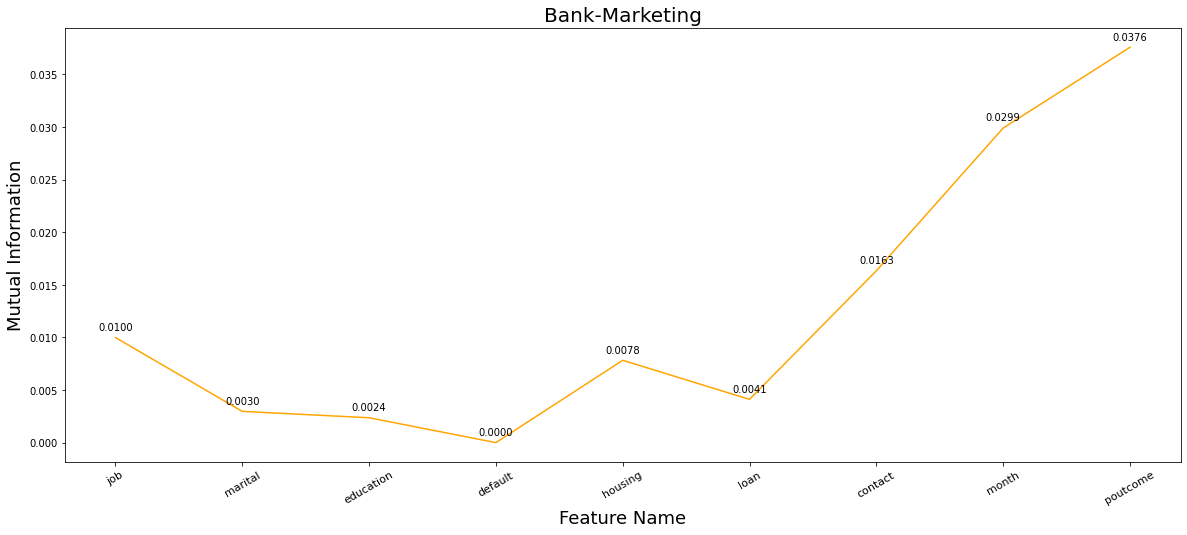

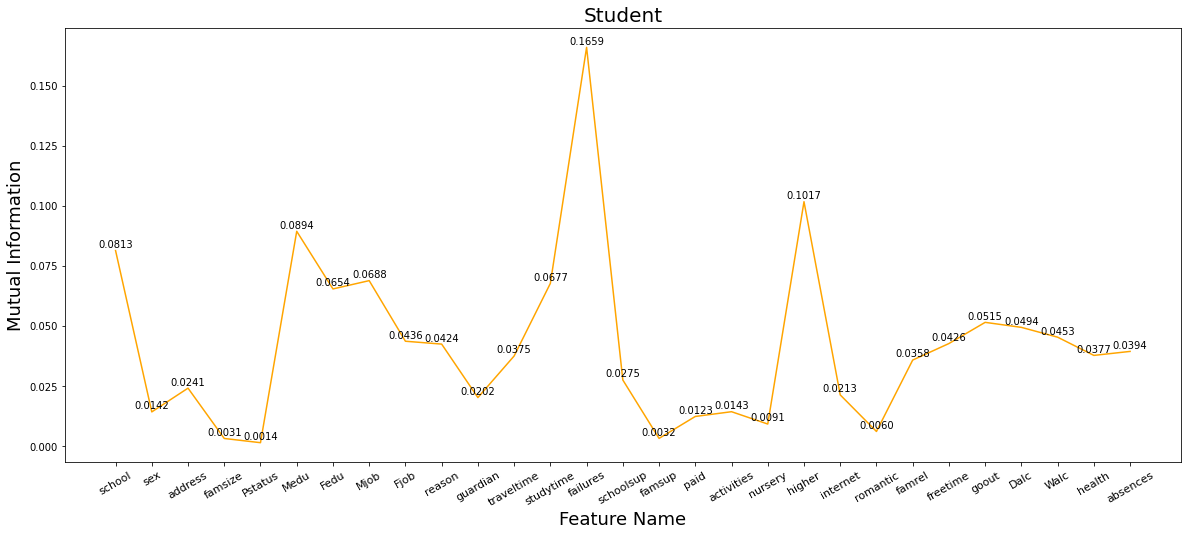

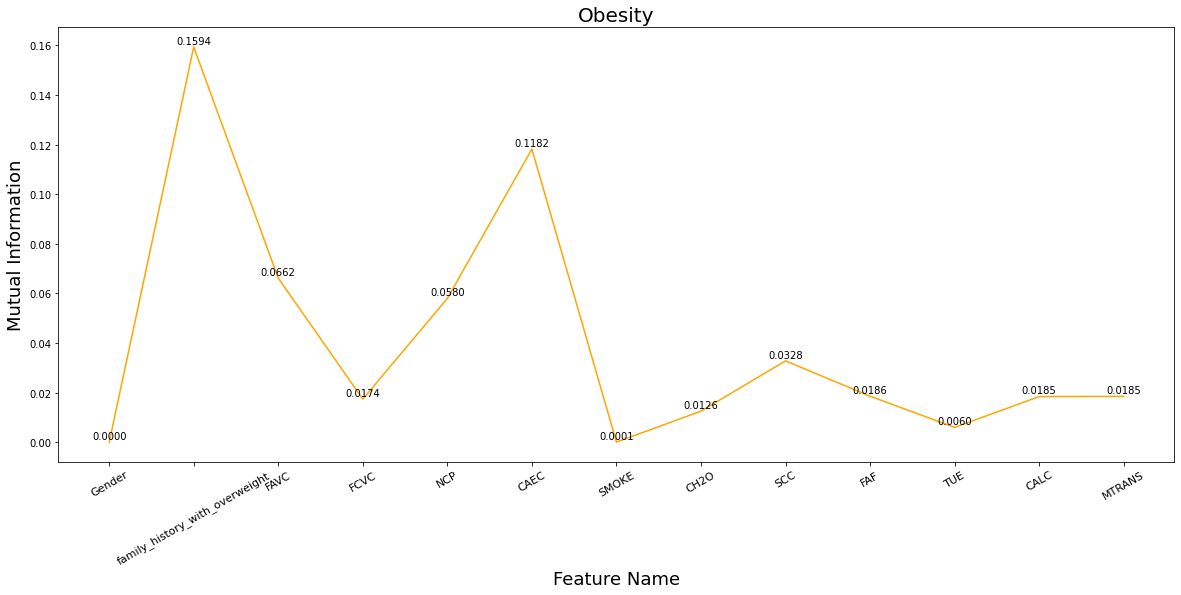

In [150]:
# Write additional code here, if necessary (you may insert additional code cells)
import math
import matplotlib.pyplot as plt
def get_mi(features,labels):
    features_mi = [] 
    
    #1. count each label and the each feature_value under the each label condition
    label_count, feature_label_count, feature_count = count_label_and_feature_label(features,labels)
    
    #2. calculate the mi
    total_count = len(labels)
    for index in range(len(features[0])):
        current_mi = 0
        for key, count in feature_label_count.items():
            f_i, f_v, label = key.split("|")
            feature_v = "|".join([f_i,f_v])
            if f_i == str(index):
                p_mi = (count*total_count)/(label_count[label]*feature_count[feature_v])
                current_mi += (count/total_count)*math.log(p_mi,2)
        features_mi.append(current_mi)
    return features_mi


def plot(filename,features,labels,feature_name):
    print("\n")
    mi = get_mi(features, labels)
    attribute = list(range(len(feature_name)))
    plt.figure(figsize=(20,8))
    plt.plot(attribute, mi, color = 'orange')
    plt.xticks(attribute, feature_name,rotation=30,fontsize=11)
    plt.xlabel('Feature Name',fontsize=18)
    plt.ylabel('Mutual Information',fontsize=18)
    plt.title(filename,fontsize=20)

    for x,y in zip(attribute, mi):
        plt.text(x, y+0.0005, '%.4f' % y, ha='center', va= 'bottom')
    plt.show()

plot("Bank-Marketing",bank_features,bank_labels,bank_feature_name)
plot("Student",student_features,student_labels,student_feature_name)
plot("Obesity",obesity_features,obesity_labels,obesity_feature_name)


Provide your text answer to **Question 3.a** of 100-150 words in this cell.

Different features play different roles in the classification task.

As for Bank-Marketing, it is found that the attribute "poutcome" is the most important feature among all features, because its mutual information is the highest. Besides, the attribute "default" nearly has no impact on the task, beacuse its mutual information is close to 0, which means that the it is irrelevant to the classification.

As for Student, it is found that the attribute "features" is the most important feature among all features, because its mutual information is the highest. Besides, the attributes "romantic","famsize" and "Patatus" nearly have no impact on the task, beacuse their mutual information is close to 0, which means that the they are irrelevant to the classification.

As for Obesity, it is found that the attributes "famility_history_with_overweight" and "CAEC" are more important than others, because their mutual information are higher. Besides, the attributes "Gender" and "SMOKE" nearly have no impact on the task, beacuse their mutual information is close to 0, which means that the they are irrelevant to the classification.

Provide your text answer to **Question 3.b** of 100-150 words in this cell.

Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. This is because the probability of  𝑝(𝑥1,𝑥2,⋯,𝑥𝑚|𝑦)  is infeasible where  𝑦  is the class and  𝑥𝑖  is the  𝑖 th feature. But with this assumption,  𝑝(𝑥1,𝑥2,⋯,𝑥𝑚|𝑦)≈∏𝑚𝑖=1𝑝(𝑥𝑖|𝑦)  and  𝑝(𝑥𝑖|𝑦)  is feasible.

As for Bank-Marketing, if the class is no, month (last contact month of year) dose not depend on poutcome(outcome of the previous marketing campaign).
As for Student, if the class is C, Pstatus (parents cohabitation status) dose not depend on famrel (quality of family relationships).
As for Obesity, if the class is obese, NCP (Number of main meals) dose not depend on CAEC (Consumption of food between meals).
But these are against common sense.

## Question 4: Feature Selection and Ethics [4 marks]

In [151]:
# Write additional code here, if necessary (you may insert additional code cells)
print("\nbank-marking")
without_ethics_bank_features = []
for feature in bank_features:
    without_ethics_bank_features.append([feature[idx] for idx in [1,3,4,5,7]])
bank_log_label_p, bank_log_feature2label_p = train(without_ethics_bank_features,bank_labels)
bank_predict_labels, bank_predict_probas = predict(without_ethics_bank_features,bank_log_label_p, bank_log_feature2label_p )
evaluation_list = evaluate(bank_labels,bank_predict_labels)
for key,value in evaluation_list.items():
    print(key, ":", value)
    
print("\nStudent")
without_ethics_student_features = []
for feature in student_features:
    without_ethics_student_features.append([feature[idx] for idx in [12, 13, 24, 25, 26, 28]])
student_log_label_p, student_log_feature2label_p = train(without_ethics_student_features,student_labels)
student_predict_labels, student_predict_probas = predict(without_ethics_student_features,student_log_label_p, student_log_feature2label_p )
evaluation_list = evaluate(student_labels,student_predict_labels)
for key,value in evaluation_list.items():
    print(key, ":", value)
    
print("\nObesity")
without_ethics_obesity_features = []
for feature in obesity_features:
    without_ethics_obesity_features.append([feature[idx] for idx in range(2,13)])
obesity_log_label_p, obesity_log_feature2label_p = train(without_ethics_obesity_features,obesity_labels)
obesity_predict_labels, obesity_predict_probas = predict(without_ethics_obesity_features,obesity_log_label_p,obesity_log_feature2label_p )
evaluation_list = evaluate(obesity_labels,obesity_predict_labels)
for key,value in evaluation_list.items():
    print(key, ":", value)



bank-marking
overall accuracy : 0.8823269188232692
overall error : 0.11767308117673081
label (yes) precision : 0.43956043956043955
label (yes) recall : 0.07677543186180422
label (yes) f1_score : 0.130718954248366
label (no) precision : 0.8914221218961625
label (no) recall : 0.98725
label (no) f1_score : 0.9368920521945434

Student
overall accuracy : 0.3913713405238829
overall error : 0.6086286594761171
macro_precision : 0.3610164925261712
macro_recall : 0.299125783737285
macro_f1_score : 0.29799933710979204
micro_precision : 0.3913713405238829
micro_recall : 0.3913713405238829
micro_f1_score : 0.3913713405238829
weighted_precision : 0.3717203883372989
weighted_recall : 0.3913713405238829
weighted_f1_score : 0.36319812042619426

Obesity
overall accuracy : 0.7437233538607295
overall error : 0.2562766461392705
label (not-obese) precision : 0.8235930735930735
label (not-obese) recall : 0.6681299385425812
label (not-obese) f1_score : 0.7377605428986913
label (obese) precision : 0.681550126

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

In the student data set, gender as a feature plays a certain role in classification. According to the results of question 3, the mutual information of "sex" is the same as that of "activity"(whether they participate in extracurricular activities), indicating that they have the same effect on classification, which obviously results in gender discrimination. What's more, a student's family history, such as their "guardian", is taken into account while grading them. It implies that applicants with poor backgrounds but strong academic records would not be admitted, which is unfair.


Provide your text answer to **Question 4.b** of 100-150 words in this cell.

The performance of a classifier with cleaned features is worse than the one with full features. This indicates that although the removed attributes are not ethical, they are closely related to the classification results, and there will be less features after removal. For example, students' grades are closely related to whether their parents provide educational support. Students who are provided with support are more likely to get high grades.

Provide your text answer to **Question 4.c** of 100-150 words in this cell.

If all ethical features are removed, it is still not guaranteed to be a fair classifier. This is because the data set itself collects limited features, and there are many influencing factors of a person's performance, which are also different from person to person. We cannot find out all the factors and collect them, so it is unfair to some people with special circumstances. For example, a naturally intelligent student may spend very little time studying, and although he can easily handle exams, he get low grade.



<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: ZHUOYA ZHOU
   
   <b>Dated</b>: 31/08/2022